In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

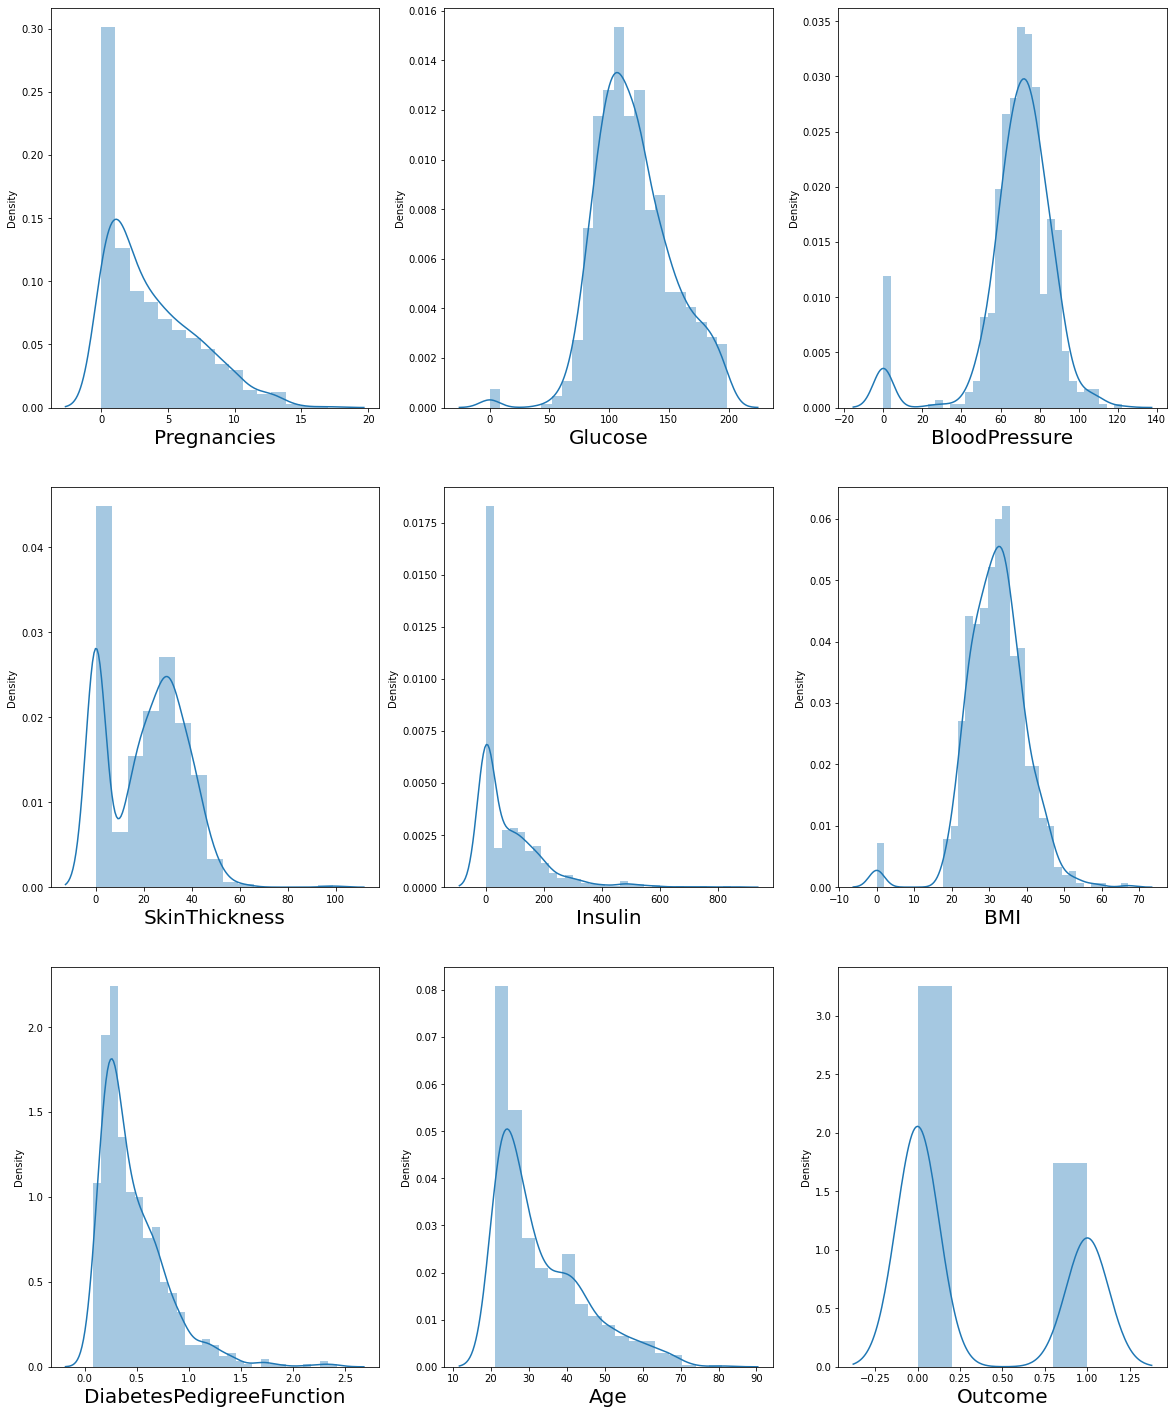

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

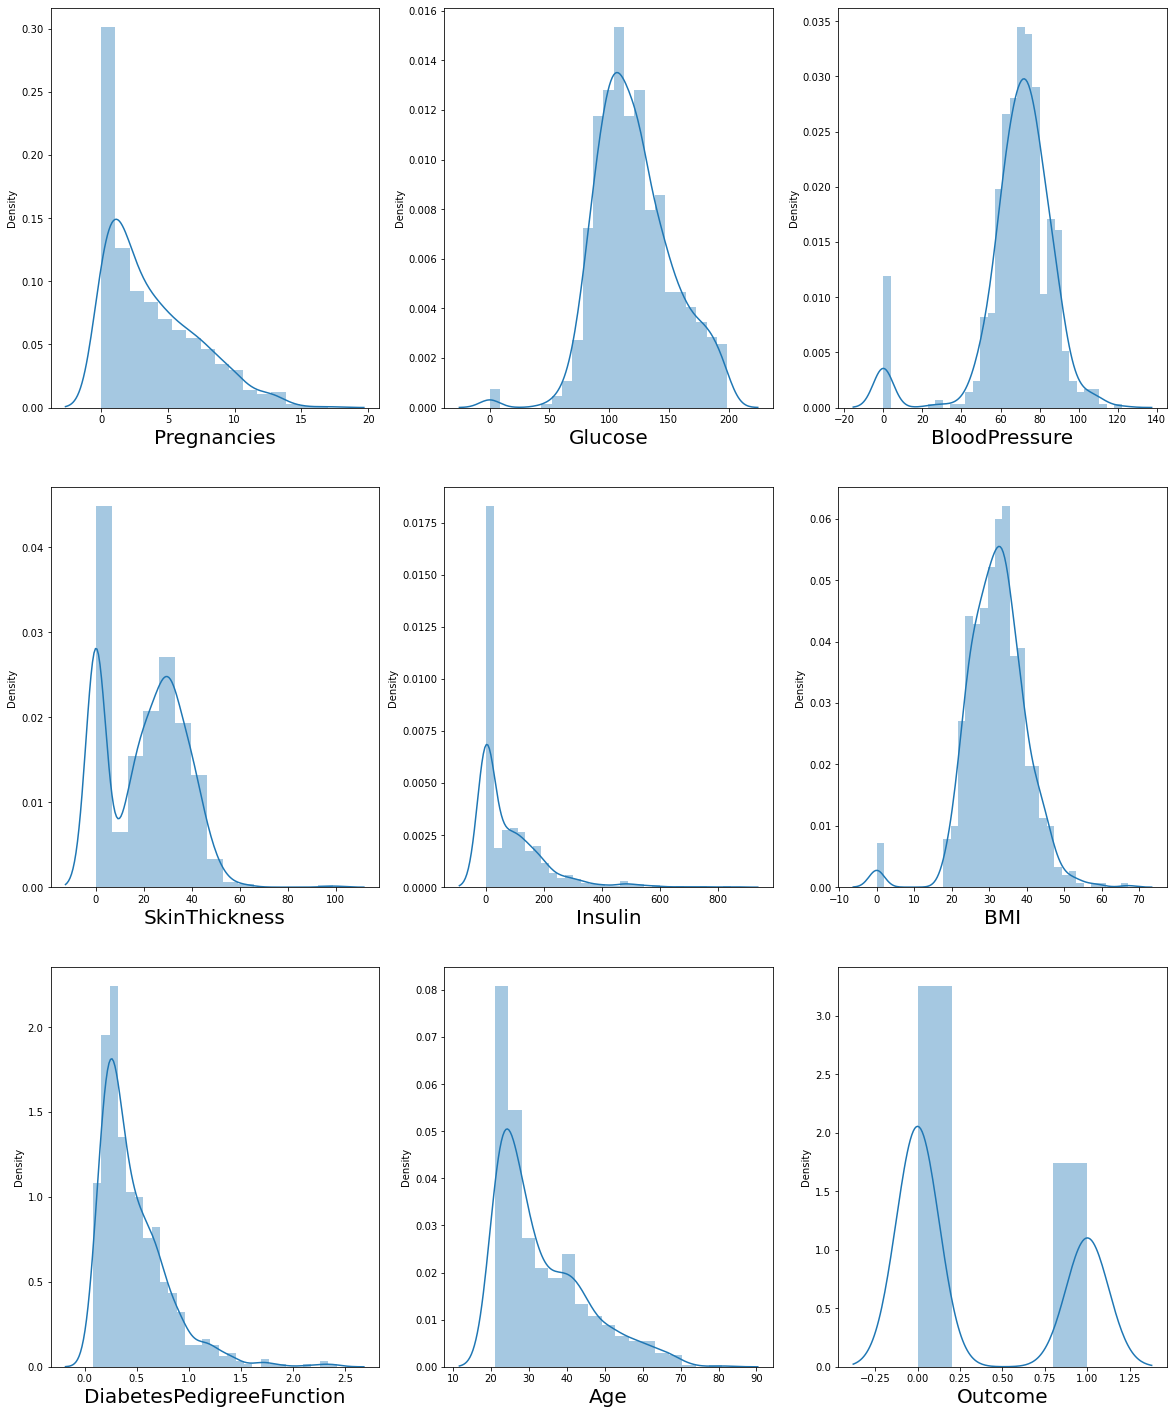

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [22]:
df_features=data.drop('Outcome',axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

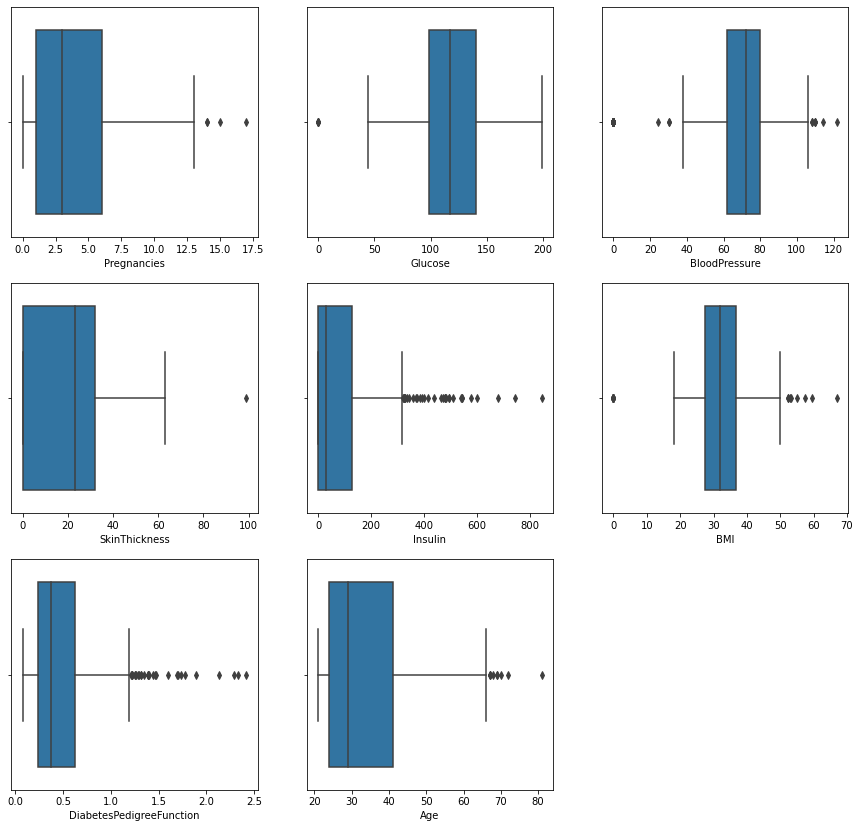

In [25]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [27]:
data.shape

(768, 9)

In [24]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [28]:
preg_high=(q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [30]:
index=np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [36]:
data=data.drop(data.index[index])
data.shape

(764, 9)

In [37]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101,76,48,180,32.9,0.171,63,0
760,764,2,122,70,27,0,36.8,0.340,27,0
761,765,5,121,72,23,112,26.2,0.245,30,0
762,766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
bp_high=(q3.BloodPressure+(1.5*iqr.BloodPressure))
print(bp_high)

index=np.where(data['BloodPressure']>bp_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

107.0
(65, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,78,50,32,88,31.0,0.248,26,1
1,7,10,115,0,0,0,35.3,0.134,29,0
2,15,7,100,0,0,0,30.0,0.484,32,1
3,18,1,103,30,38,83,43.3,0.183,33,0
4,49,7,105,0,0,0,0.0,0.305,24,0
...,...,...,...,...,...,...,...,...,...,...
60,697,0,99,0,0,0,25.0,0.253,22,0
61,703,2,129,0,0,0,38.5,0.304,41,0
62,706,10,115,0,0,0,0.0,0.261,30,1
63,729,2,92,52,0,0,30.1,0.141,22,0


In [43]:
sn_high=(q3.SkinThickness+(1.5*iqr.SkinThickness))
print(sn_high)

index=np.where(data['SkinThickness']>sn_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

80.0
(722, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
717,763,10,101,76,48,180,32.9,0.171,63,0
718,764,2,122,70,27,0,36.8,0.340,27,0
719,765,5,121,72,23,112,26.2,0.245,30,0
720,766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
insu_high=(q3.Insulin+(1.5*iqr.Insulin))
print(insu_high)

index=np.where(data['Insulin']>insu_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

318.125
(723, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
718,763,10,101,76,48,180,32.9,0.171,63,0
719,764,2,122,70,27,0,36.8,0.340,27,0
720,765,5,121,72,23,112,26.2,0.245,30,0
721,766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
bmi_high=(q3.BMI+(1.5*iqr.BMI))
print(bmi_high)

index=np.where(data['BMI']>bmi_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.550000000000004
(716, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
711,763,10,101,76,48,180,32.9,0.171,63,0
712,764,2,122,70,27,0,36.8,0.340,27,0
713,765,5,121,72,23,112,26.2,0.245,30,0
714,766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)

index=np.where(data['Age']>age_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(707, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
702,763,10,101,76,48,180,32.9,0.171,63,0
703,764,2,122,70,27,0,36.8,0.340,27,0
704,765,5,121,72,23,112,26.2,0.245,30,0
705,766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
dpf_high=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(dpf_high)

index=np.where(data['DiabetesPedigreeFunction']>dpf_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(681, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
676,763,10,101,76,48,180,32.9,0.171,63,0
677,764,2,122,70,27,0,36.8,0.340,27,0
678,765,5,121,72,23,112,26.2,0.245,30,0
679,766,1,126,60,0,0,30.1,0.349,47,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

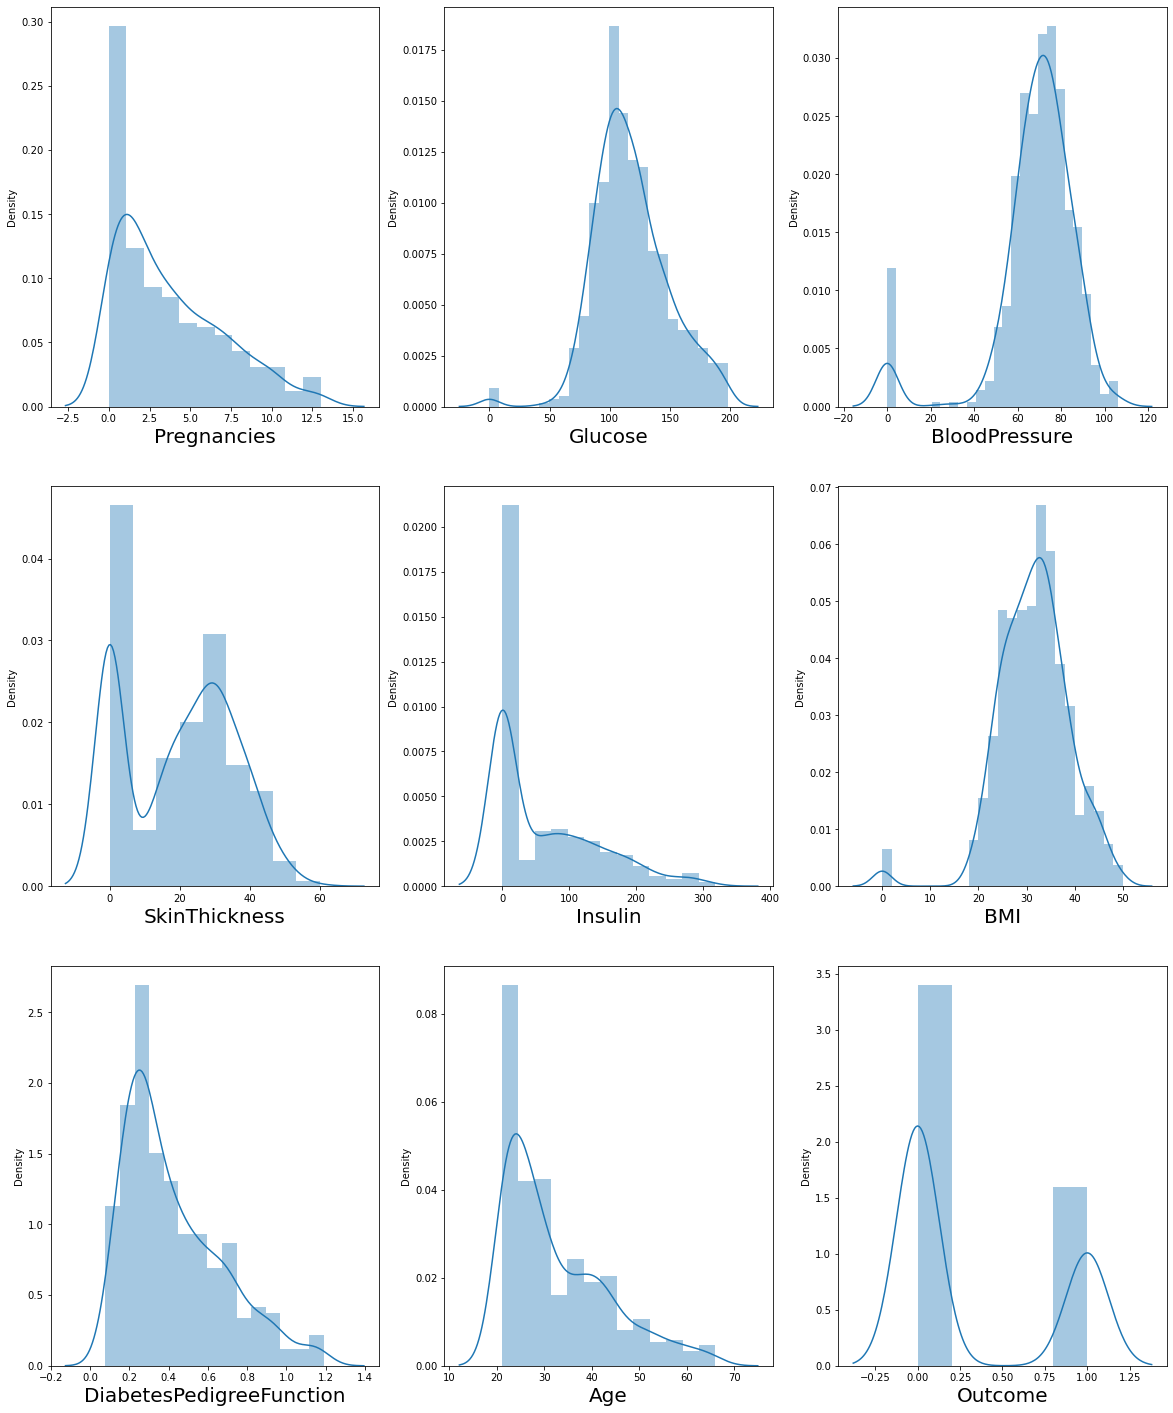

In [49]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [61]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

KeyError: 'Outcome'

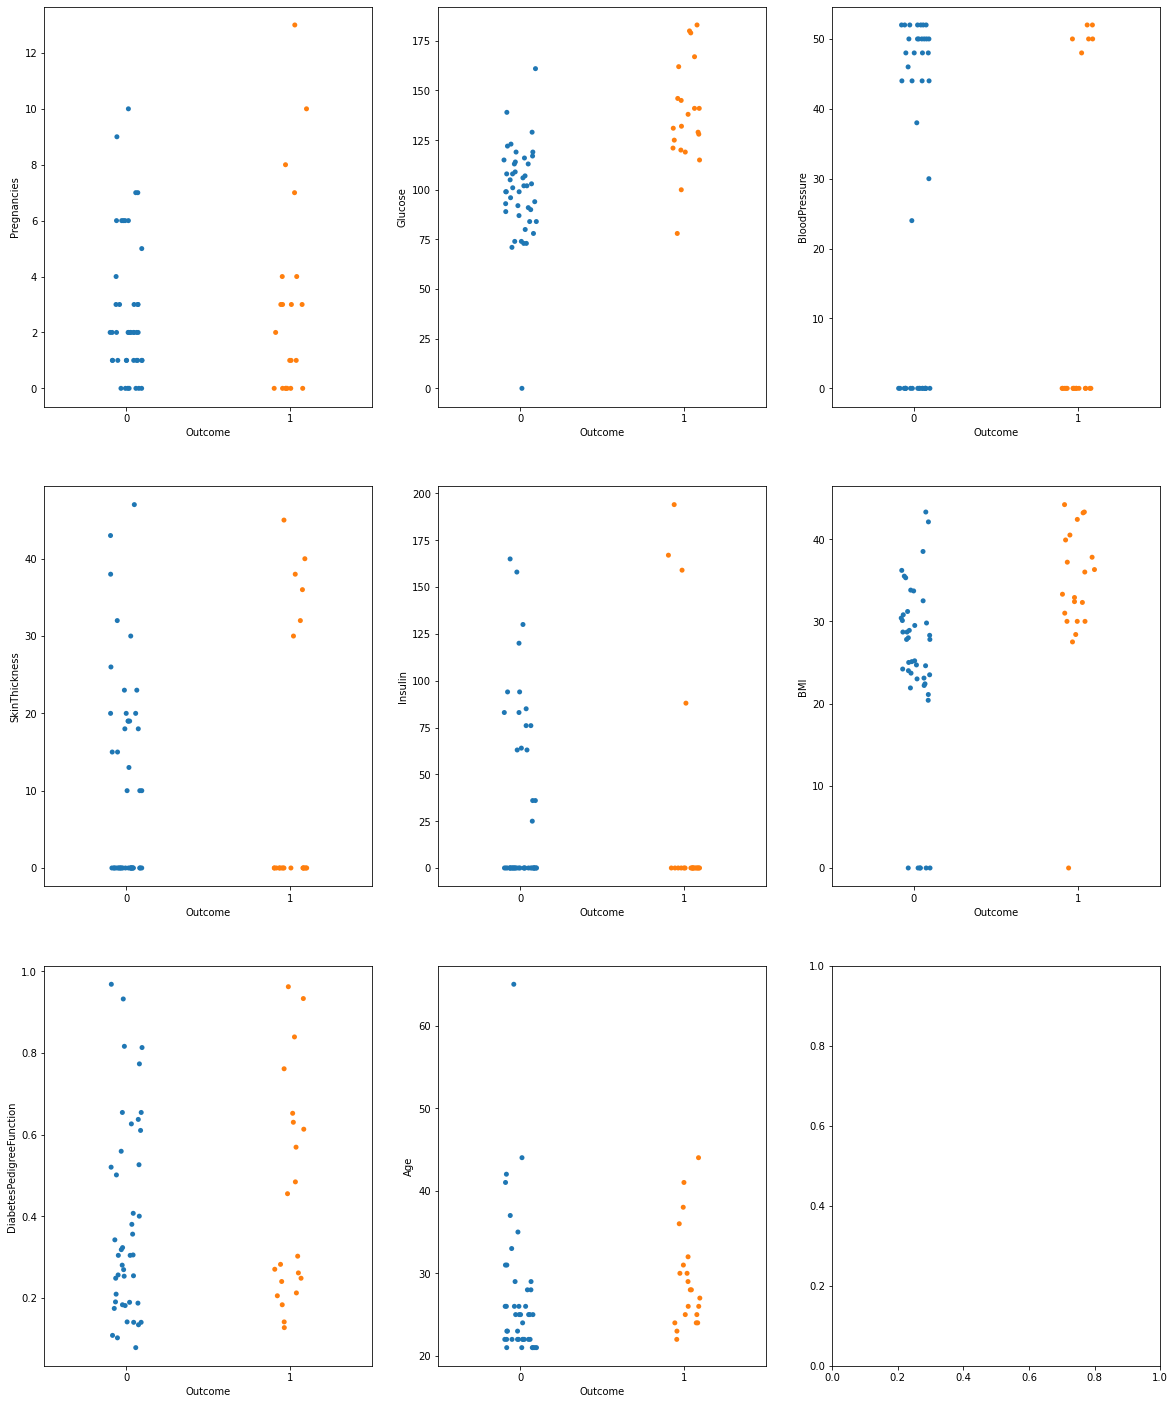

In [62]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [63]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [65]:
X_scaled.shape[1]

8

In [67]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.196236,Pregnancies
1,1.549006,Glucose
2,1.944136,BloodPressure
3,2.991881,SkinThickness
4,2.926319,Insulin
5,1.523872,BMI
6,1.293883,DiabetesPedigreeFunction
7,1.435528,Age


In [68]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)


In [69]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [70]:
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav','wb') as f:
    pickle.dump(scalar,f)

In [71]:
y_pred=log_reg.predict(x_test)

In [72]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7647058823529411

In [73]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[10,  1],
       [ 3,  3]], dtype=int64)

In [74]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [75]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7647058823529411

In [76]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.9090909090909091

In [77]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.7692307692307693

In [83]:
F1_Score=2*(Recall*Precision)/(Precision+Recall)
F1_Score

0.8333333333333333

In [78]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [79]:
tpr

array([0. , 0.5, 1. ])

In [81]:
threshold

array([2, 1, 0], dtype=int64)

In [84]:
auc=1-(true_negative/(true_negative+false_positive))
auc

0.25

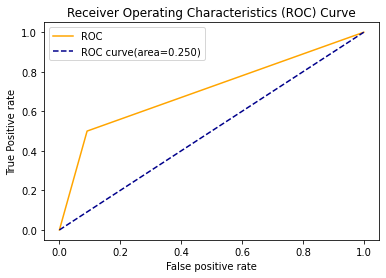

In [85]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()